<a href="https://colab.research.google.com/github/Gilgamesh60/Optimized-MNIST/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, I'll load the MNIST multidigit classification model I created in the previous notebook with PyTorch. Then we will use this model for predicting the class of a single input image.


For implementing this notebook, please download the `main.py` and `checkpoint.pt` files that I have shared.



# Importing Libraries

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import warnings
warnings.filterwarnings('ignore')
# upload external file before import
from google.colab import files
files.upload()

Saving checkpoint.pt to checkpoint.pt


# Importing the Model architecture.

To make things more concise here,I created a seperate python file containing CNN model and training function.I have named the file `main.py`. Importing this, we can easily create a CNN network with and train the network using train function.

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('main.py','wb').write(src)
import main

Saving main.py to main.py


In [ ]:
#Now we will import our CNN model and training function to train that CNN model.
from main import ModelM3


# Our train function takes these inputs : EPOCHS,optimizer,model,trainloader,testloader,DEVICE
#It will give the loss and accuract at each Epoch as an output.
from main import train

# Importing and formatting MNIST

In order to test our model out, I decided to use the ready made MNIST dataset stored pytorch datasets module. We will see the accuracy of our loaded model on this database.

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=True)

 

Here we can see one of the images.We will see how our model predicts its class




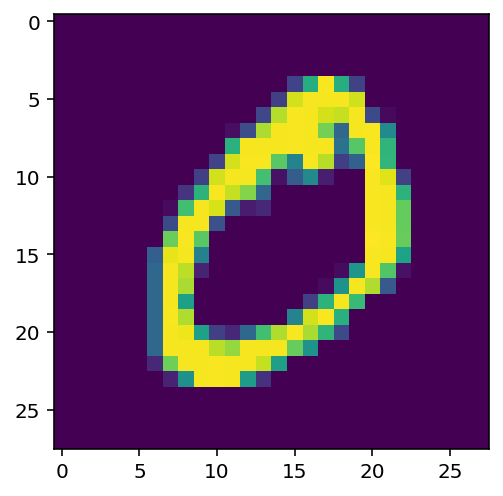

In [ ]:
testset = datasets.MNIST('MNIST_data/', download=True) # we will use this dataset for single image prediction 
plt.imshow(testset[1][0])

## Loading the model

The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers. Same goes for optimizer `state_dict`. In the previous noteboolk I saved both of them in a `checkpoint.pt` file. By loading the file we will be able to configure our model for digit classification/recognition tasks.

In [ ]:
checkpoint=torch.load('/content/checkpoint.pt')

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=ModelM3()
model.load_state_dict(checkpoint['model_state_dict'])
learning_rate=0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model.train()

ModelM3(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4_bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(80, 96, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv5_bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(96, 112, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv6_bn): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 ModelM3(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4_bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(80, 96, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv5_bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(96, 112, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv6_bn): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, 

In [ ]:
model.eval()

ModelM3(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4_bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(80, 96, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv5_bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(96, 112, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv6_bn): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_

# Building an Image Classifier


We will finally use our generated model to get prdictions for a single image

In [ ]:
#this will take an input image and give a output tensor for prediction
def transform_image(img):
    my_transforms = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))])
    image = np.asarray(img)
    return my_transforms(image).unsqueeze(0)

In [ ]:
#outputs the predicted class and confidence in the prediction for input image.
def get_prediction(img):
    tensor = transform_image(img)
    tensor=tensor.to(device)
    output = model.forward(tensor)
     
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, classes = torch.max(probs, 1)
    return conf.item(), classes.item()

Conclusion : 
The label for this image is 0
The prediction given by our model is 0 and confidence in the prediction is 0.9997583031654358
This is the image that we predicted the label of :


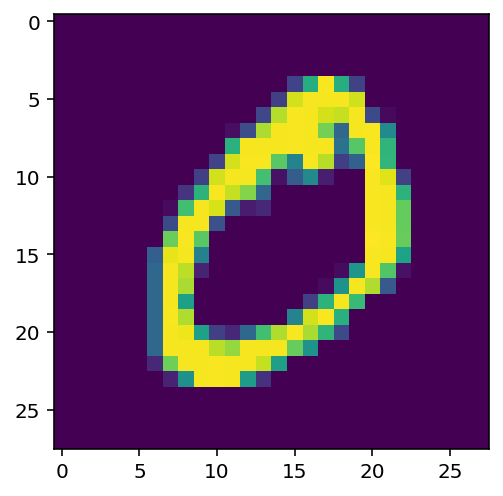

In [ ]:
print("Conclusion : ")
print(f"The label for this image is {testset[1][1]}")
print(f"The prediction given by our model is {get_prediction(testset[1][0])[1]} and confidence in the prediction is {get_prediction(testset[1][0])[0]}")
print("This is the image that we predicted the label of :")
plt.imshow(np.asarray(testset[1][0]))

This code will work for any PIL image of the size (28,28)